# Wheat Seeds Predictions - Supervised Machine Learning: Classification

The dataset is from [Kaggle](https://www.kaggle.com/datasets/jmcaro/wheat-seedsuci?resource=download) and contains information on wheat seeds. The main objective of the analysis is to predict the type of wheat seed given the various features of each seed. Multiple classification algorithms will be applied to the data in order to find the relationships between the three types of wheat seeds. THe three classifer models that will be leveraged in this notebook are k-nearest neighbors or KNN algorithm, decision trees algorithm, and random forest algorithm. The accuracy, recall, precision, and f1 score will be recorded for each estimator and the best performing will be chosen.

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, precision_recall_fscore_support 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Data Preprocessing

In [83]:
# Read raw data
data = pd.read_csv('seeds.csv')
data.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             199 non-null    float64
 1   Perimeter        199 non-null    float64
 2   Compactness      199 non-null    float64
 3   Kernel.Length    199 non-null    float64
 4   Kernel.Width     199 non-null    float64
 5   Asymmetry.Coeff  199 non-null    float64
 6   Kernel.Groove    199 non-null    float64
 7   Type             199 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


No null values are present and therefore further cleaning is unneccessary

In [85]:
print(f'The total number of rows is {data.shape[0]}')
print(f'The total number of columns is {data.shape[1]}')
print(f'The name of the columns are {list(data.columns)}')
print(f'The number of missing values is \n{data.isnull().sum()}')

The total number of rows is 199
The total number of columns is 8
The name of the columns are ['Area', 'Perimeter', 'Compactness', 'Kernel.Length', 'Kernel.Width', 'Asymmetry.Coeff', 'Kernel.Groove', 'Type']
The number of missing values is 
Area               0
Perimeter          0
Compactness        0
Kernel.Length      0
Kernel.Width       0
Asymmetry.Coeff    0
Kernel.Groove      0
Type               0
dtype: int64


## List of Features

<b>Area</b> 

<b>Perimeter</b> 

<b>Compactness</b>

<b>Kernel.Length</b>

<b>Kernel.Width</b>

<b>Asymmetry.Coeff</b>

<b>Kernel.Groove</b>

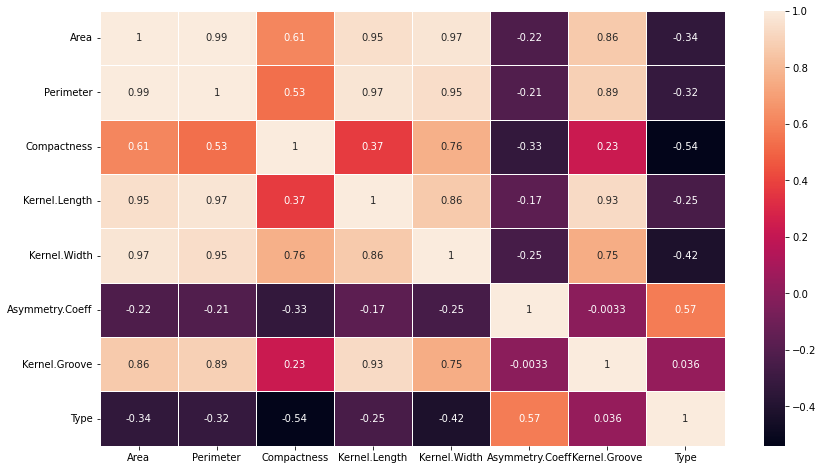

In [86]:
# Visualize correlation matrix
corr = data.corr()
fig = plt.subplots(figsize = (14, 8))
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot=True,
            linewidth=0.5);

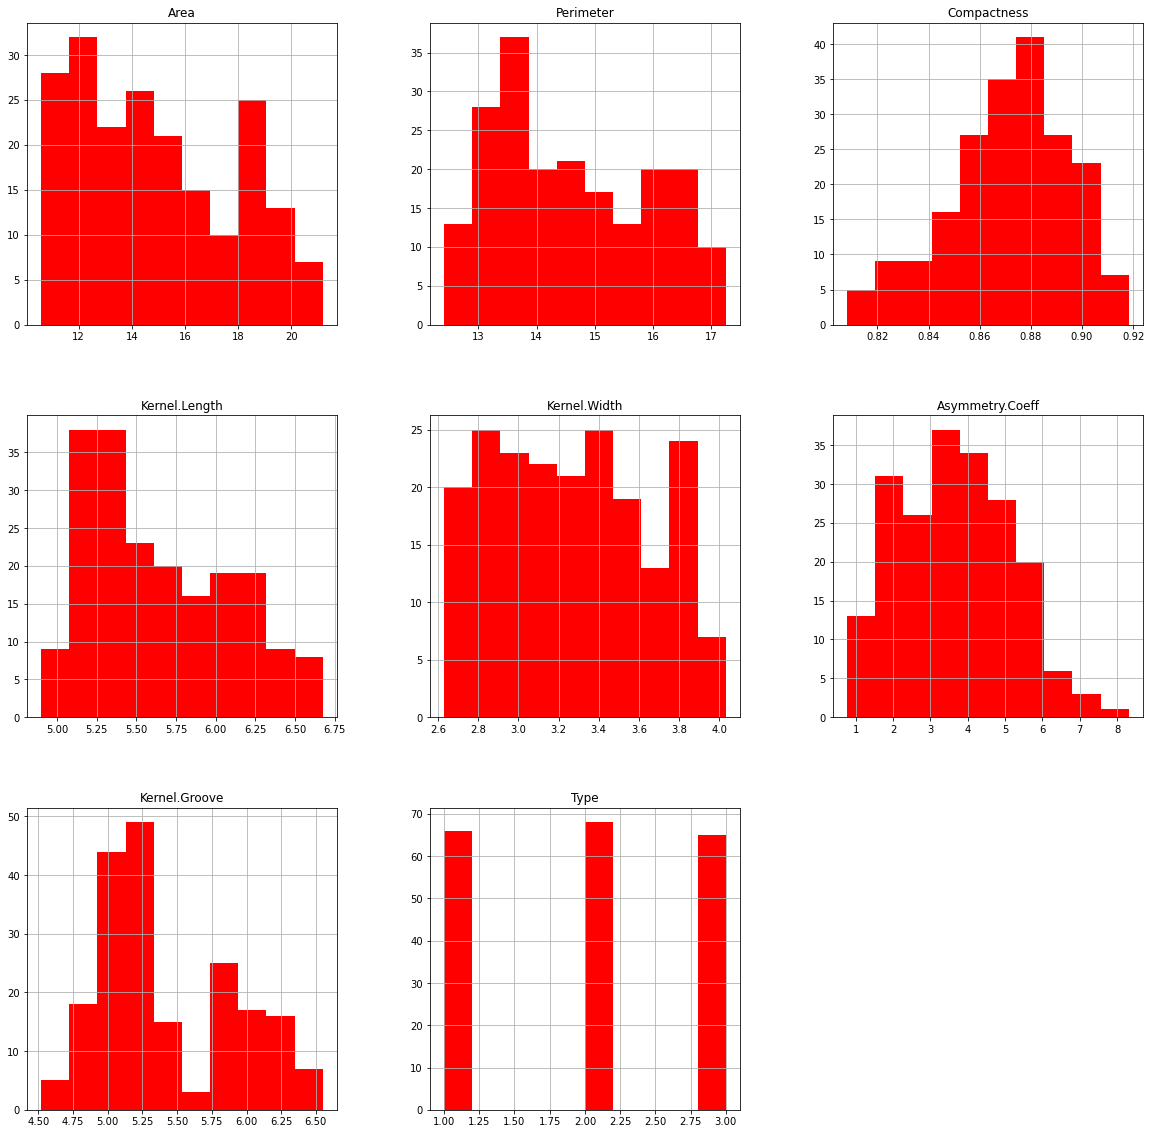

In [87]:
data.hist(figsize = (20,20), color = 'r');

The features do not seem to be very skewed and therefore do not need to be normalized

## Training and Testing Models

- Use train_test_split to split data for training and testing
- Train using KNN, Decision Trees, and Random Forest Estimators
- Visualize confusion matrix for each
- Test each model for accuracy, recall, precision, and f1 score

In [88]:
X = data.loc[:, data.columns != 'Type']
y = data['Type']

In [89]:
y.value_counts().sort_index()

1    66
2    68
3    65
Name: Type, dtype: int64

Text(0.5, 1.0, 'Types of Wheat')

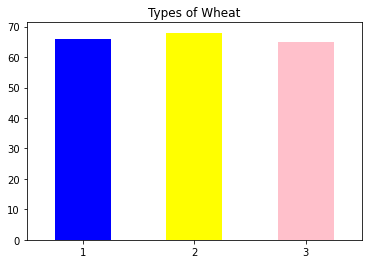

In [90]:
y.value_counts().sort_index().plot.bar(color=['blue', 'yellow', 'pink'])
plt.xticks(rotation=0);
plt.title('Types of Wheat')

In [91]:
rs = 123
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state = rs)

### KNN Model

In [92]:
# Find the test scores for value of k
scores = []
for k in range(1, 55):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train.values.ravel())
    expected = y_test
    predicted = knn_model.predict(X_test)
    accuracy = accuracy_score(expected, predicted)
    recall = recall_score(expected, predicted, average='weighted')
    precision = precision_score(expected, predicted, average='weighted')
    f1 = f1_score(expected, predicted, average='weighted')
    for index in [accuracy, recall, precision, f1]:
        scores.append(index)

# Store in data frame
scores_arr = np.array(scores)     
scores_df = pd.DataFrame(scores_arr.reshape(54,4), columns=['accuracy', 'recall', 'precision', 'f1'])
scores_df.index += 1
scores_df

,accuracy,recall,precision,f1
1,0.900000,0.900000,0.900842,0.898956
2,0.850000,0.850000,0.879012,0.851960
3,0.900000,0.900000,0.900000,0.900000
4,0.900000,0.900000,0.904306,0.901099
5,0.916667,0.916667,0.918170,0.917042
6,0.900000,0.900000,0.904306,0.901099
7,0.900000,0.900000,0.904306,0.901099
8,0.883333,0.883333,0.891474,0.885008
9,0.900000,0.900000,0.904306,0.901099
10,0.883333,0.883333,0.891474,0.885008


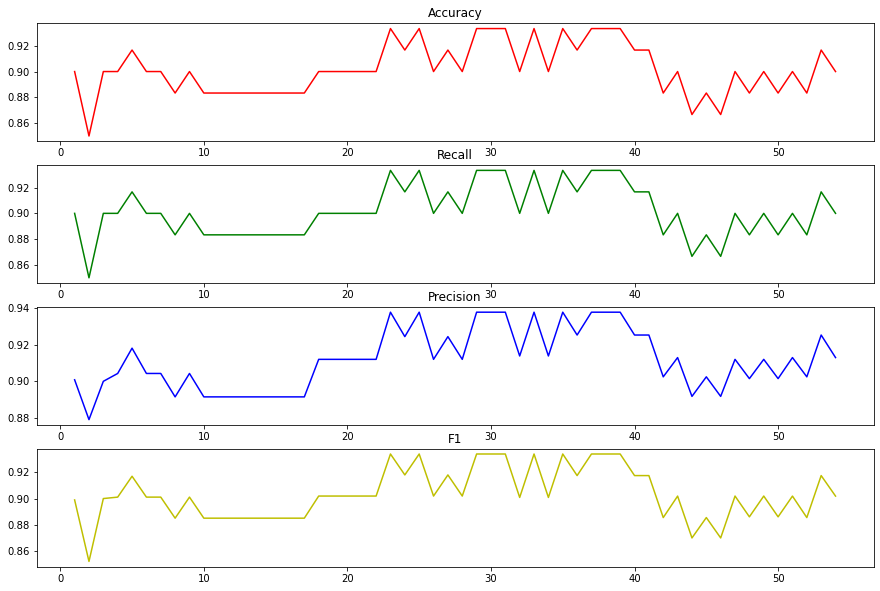

In [93]:
# Plot each testing measure across all values of k
fig, axs = plt.subplots(4, figsize=(15, 10))
fig.figsize=(12, 12)
axs[0].plot(scores_df['accuracy'], 'r')
axs[0].set_title('Accuracy')
axs[1].plot(scores_df['recall'], 'g')
axs[1].set_title('Recall')
axs[2].plot(scores_df['precision'], 'b')
axs[2].set_title('Precision')
axs[3].plot(scores_df['f1'], 'y')
axs[3].set_title('F1');

In [94]:
for index in scores_df.columns:
    print(f'The value of K with the highest {index} value is {scores_df[index].idxmax()}')

The value of K with the highest accuracy value is 23
The value of K with the highest recall value is 23
The value of K with the highest precision value is 23
The value of K with the highest f1 value is 23


The optimal value of K is 23 and will be the hyperparameter used below

In [95]:
optimal_k = 23
knn_model = KNeighborsClassifier(n_neighbors=optimal_k)
knn_model.fit(X_train, y_train.values.ravel())
predicted = knn_model.predict(X_test)
expected = y_test

In [96]:
def evaluate_metrics(expected, predicted, model):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(expected, predicted)
    precision, recall, f_beta, _ = precision_recall_fscore_support(expected, predicted, average='weighted')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    results_df = pd.DataFrame.from_dict(results_pos, orient='index', columns=[model])
    return results_df

In [97]:
knn_df = evaluate_metrics(expected, predicted, 'KNN')
knn_df

,KNN
accuracy,0.933333
recall,0.933333
precision,0.937879
f1score,0.934043


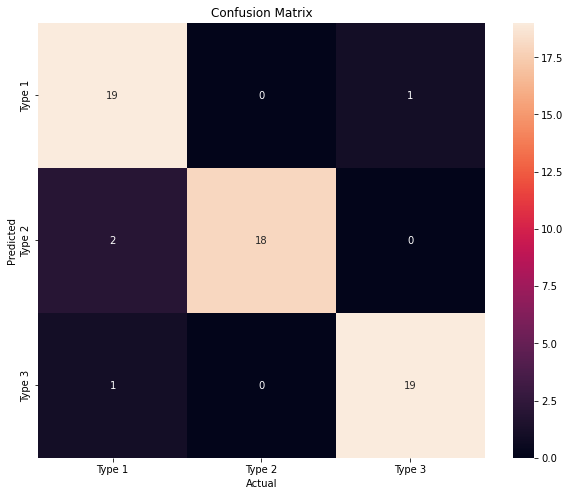

In [98]:
# Visualize confusion matrix
knn_cf = confusion_matrix(expected, predicted)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(knn_cf, annot=True, fmt="d", xticklabels=["Type 1", "Type 2", "Type 3"], 
                 yticklabels=["Type 1", "Type 2", "Type 3"])
ax.set(title="Confusion Matrix");
plt.xlabel('Actual')
plt.ylabel('Predicted');

### Decision Tree

In [99]:
# Range of hyperparameters used in GridSearchCV to determine optimal estimator parameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5]
}

In [100]:
dt_search = GridSearchCV(DecisionTreeClassifier(random_state=rs),
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=3)

dt_search.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 5]},
             scoring='accuracy')

In [101]:
dt_search.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1}

Use the best parameters from the GridSearchCV model to use for below

In [102]:
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=1, random_state=rs)
dt_model.fit(X_train, y_train.values.ravel())
expected = y_test
predicted = dt_model.predict(X_test)

In [103]:
dt_df = evaluate_metrics(expected, predicted, 'Decision Tree')
dt_df

,Decision Tree
accuracy,0.916667
recall,0.916667
precision,0.919048
f1score,0.917469


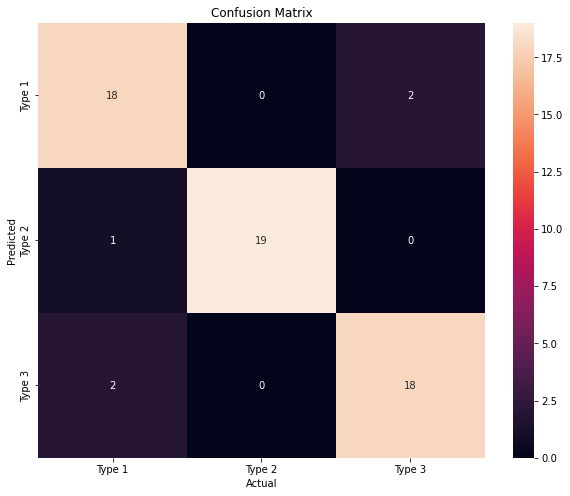

In [104]:
# Visualize confusion matrix
dt_cf = confusion_matrix(expected, predicted)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(dt_cf, annot=True, fmt="d", xticklabels=["Type 1", "Type 2", "Type 3"], 
                 yticklabels=["Type 1", "Type 2", "Type 3"])
ax.set(title="Confusion Matrix");
plt.xlabel('Actual')
plt.ylabel('Predicted');

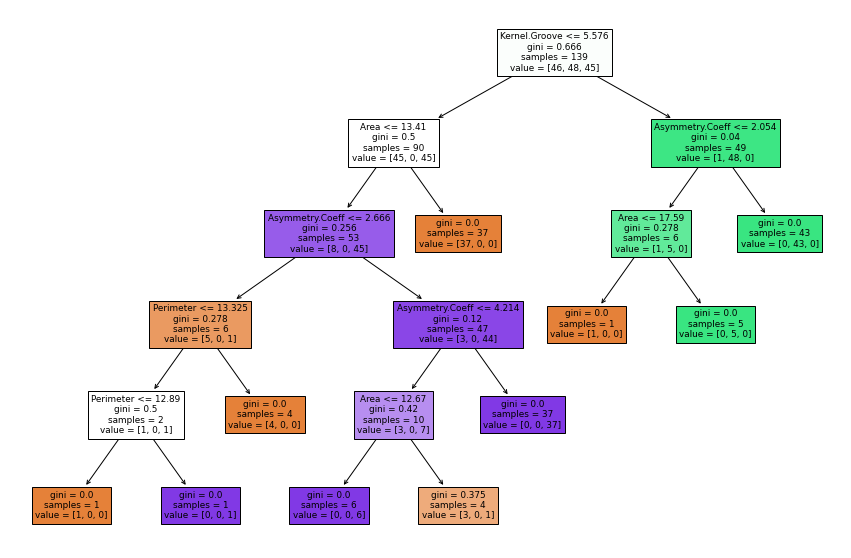

In [105]:
# Plot decision tree
plt.subplots(figsize=(15, 10)) 
tree.plot_tree(dt_model, feature_names=X.columns, filled=True)
plt.show()

### Random Forest

In [106]:
# Range of hyperparameters used in GridSearchCV to determine optimal estimator parameters
param_grid = {'n_estimators': range(1, 40),
             'max_depth' : range(1, 40),
             'max_features':["auto", "sqrt", "log2"]}

In [107]:
rf_search = GridSearchCV(RandomForestClassifier(random_state=rs),
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=3)

rf_search.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=123),
             param_grid={'max_depth': range(1, 40),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': range(1, 40)},
             scoring='accuracy')

In [108]:
rf_search.best_params_

{'max_depth': 6, 'max_features': 'auto', 'n_estimators': 30}

Use the best parameters from the GridSearchCV model to use for below

In [113]:
rf_model = RandomForestClassifier(max_depth=6, max_features='auto', n_estimators=30, random_state=rs)
rf_model.fit(X_train, y_train.values.ravel())
expected = y_test
predicted = rf_model.predict(X_test)

In [114]:
rf_df = evaluate_metrics(expected, predicted, 'Random Forest')
rf_df

,Random Forest
accuracy,0.933333
recall,0.933333
precision,0.938003
f1score,0.933109


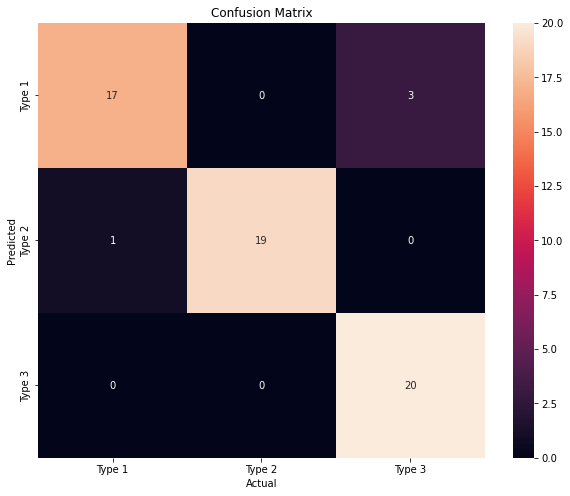

In [111]:
# Visualize confusion matrix
rf_cf = confusion_matrix(expected, predicted)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(rf_cf, annot=True, fmt="d", xticklabels=['Type 1', 'Type 2', 'Type 3'], 
                 yticklabels=['Type 1', 'Type 2', 'Type 3'])
ax.set(title="Confusion Matrix");
plt.xlabel("Actual")
plt.ylabel("Predicted");

In [115]:
# Visualize combined results
combined_df = knn_df.join([dt_df, rf_df])
combined_df

,KNN,Decision Tree,Random Forest
accuracy,0.933333,0.916667,0.933333
recall,0.933333,0.916667,0.933333
precision,0.937879,0.919048,0.938003
f1score,0.934043,0.917469,0.933109


## Conclusion/Next Steps

Given the results above the KNN and random forest models score the best among the testing measures used while the decision trees model falls slighly behind. I would recommend using the KNN model over the random forest model as the KNN model is easier to interpret while yielding similar results. The next step that could be taken to improve the models would be to use a dataset with more data as the models would be less overfit. Another step would be to using different boosting methods to utilize other models to find possibly better results.